In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import log
import anndata as ad
import pandas as pd

## frozen_perserved_UBCS_200
#####################################################

In [ ]:
input_file = "/Users/manuel/Desktop/bowtie_strategy/complete_dge_matrix/expression.h5ad"

In [ ]:
sp_dge = sc.read(input_file)

In [ ]:
sp_dge.obs['no_umis'] = np.sum(sp_dge.X, axis=1)

In [ ]:
no_umis = sp_dge.obs['no_umis']

In [ ]:
no_umis_log10 = []
for x in no_umis:
    if x != 0:
        no_umis_log10.append(log(x,10))
    else:
        no_umis_log10.append(x)

In [ ]:
bins = []
i = 0
while i <= 7:
    bins.append(i)
    i += 0.1

In [ ]:
plt.hist(no_umis_log10, bins=bins, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [ ]:
lower_lim = sp_dge.obs['no_umis'] > 5000
upper_lim = sp_dge.obs['no_umis'] < 100000
sp_dge.obs['keep'] = lower_lim & upper_lim

## dge_matrix_umi_d2
#####################################################

In [2]:
input_file = "/Volumes/win_mac/dge_matrix_umid2/dge_matrix_umid2.h5ad"
sp_dge_d2 = sc.read(input_file)

In [3]:
sp_dge_d2

AnnData object with n_obs × n_vars = 442172 × 23004 

In [4]:
sc.pp.calculate_qc_metrics(sp_dge_d2, inplace=True)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return values / sums[:, None]
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


### save log normalized matrix

In [4]:
sc.pp.normalize_total(sp_dge_d2, target_sum=1e4)

In [8]:
sc.pp.log1p(sp_dge_d2)

In [9]:
sc.pp.highly_variable_genes(sp_dge_d2, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [11]:
sp_dge_d2_hvg = sp_dge_d2[:, sp_dge_d2.var.highly_variable]

In [12]:
output_file = "/Volumes/win_mac/dge_matrix_umid2/dge_matrix_umid2_log_nom_hvgs.h5ad"
sp_dge_d2_hvg.write(output_file, compression='gzip')

In [14]:
output_file = "/Volumes/win_mac/dge_matrix_umid2/dge_matrix_umid2_log_nom.h5ad"
sp_dge_d2.write(output_file, compression='gzip')

## ------------------------------

### analysis of raw data

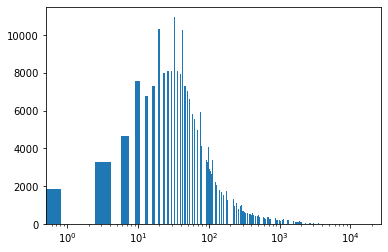

In [31]:
plt.hist(sp_dge_d2.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
# plt.yscale('log')
plt.xscale('log')

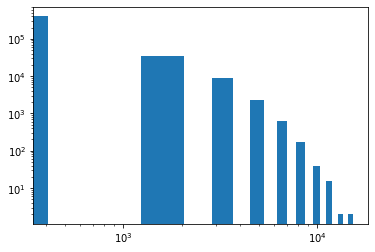

In [9]:
plt.hist(sp_dge_d2.obs['total_counts'], histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

In [39]:
lower_lim = sp_dge_d2.obs['total_counts'] > 50
# upper_lim = sp_dge_d2.obs['total_counts'] < 5000

print(np.sum(lower_lim))
# print(np.sum(upper_lim))

sp_dge_d2.obs['keep'] = lower_lim
print(np.sum(sp_dge_d2.obs['keep']))

329345
329345


In [40]:
yy = sp_dge_d2[sp_dge_d2.obs['keep'] == True,]

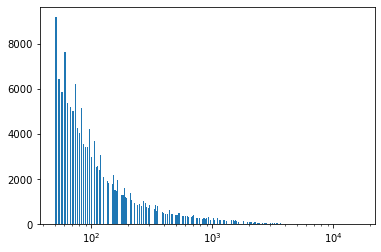

In [41]:
plt.hist(yy.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.xscale('log')

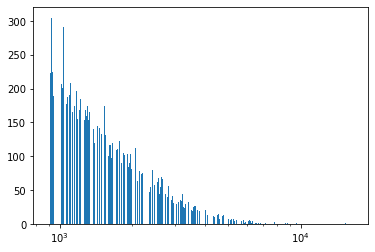

In [35]:
# for --> lower_lim = sp_dge_d2.obs['total_counts'] > 900
plt.hist(yy.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
# plt.yscale('log')
plt.xscale('log')

In [19]:
output_file = "/Volumes/win_mac/dge_matrix_umid2/dge_matrix_umid2_presel.h5ad"
yy.write(output_file, compression='gzip')

In [26]:
sc.pp.calculate_qc_metrics(sp_dge_d2, inplace=True)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return values / sums[:, None]
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [29]:
sc.tl.pca(sp_dge_d2_hvg, svd_solver='arpack')

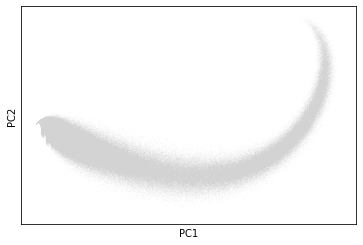

In [32]:
sc.pl.pca(sp_dge_d2_hvg)

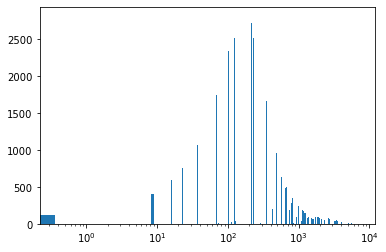

In [34]:
plt.hist(sp_dge_d2.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.xscale('log')

## dge_matrix_umi_d1
#####################################################

In [4]:
input_file = "/Volumes/win_mac/dge_matrix_umid1/dge_matrix_umid1.h5ad"

In [5]:
sp_dge_d1 = sc.read(input_file)

In [ ]:
sc.pp.calculate_qc_metrics(sp_dge_d1, inplace=True)

In [ ]:
sp_dge_d1.obs['no_umis'] = np.sum(sp_dge_d1.X, axis=1)

In [ ]:
no_umis = sp_dge_d1.obs['no_umis']

In [ ]:
no_umis_log10 = []
for x in no_umis:
    if x != 0:
        no_umis_log10.append(log(x,10))
    else:
        no_umis_log10.append(x)

In [ ]:
sp_dge_d1.obs['no_umis_log10'] = no_umis_log10

In [ ]:
sp_dge_d1.obs

In [ ]:
bins = []
i = 0
while i <= 20000:
    bins.append(i)
    i += 250

In [ ]:
plt.hist(no_umis, bins=bins, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [ ]:
plt.hist(no_umis_log10, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.axvline(1)

In [ ]:
lower_lim = sp_dge_d1.obs['no_umis'] > 330
upper_lim = sp_dge_d1.obs['no_umis'] < 10000
sp_dge_d1.obs['keep'] = lower_lim & upper_lim

In [ ]:
sum(sp_dge_d1.obs["keep"])

### take subset of cells

In [ ]:
yy = sp_dge_d1[sp_dge_d1.obs['keep'] == True,]

In [ ]:
plt.hist(yy.obs['no_umis_log10'], histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [ ]:
yy.obs['no_umis'].sum()

### save subset of cells

In [ ]:
output_file = "/Volumes/win_mac/dge_matrix_umid1/dge_matrix_umid1_presel.h5ad"
yy.write(output_file, compression='gzip')

# dge_matrix_umid0
#####################################################

In [16]:
input_file = "/Volumes/win_mac/dge_matrix_umid0/dge_matrix_umid0.h5ad"
sp_dge = sc.read(input_file)

In [15]:
table = pd.read_table('/Volumes/win_mac/dge_matrix_umid0/cluster_statistics_umisd0.txt', delimiter='\t')

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [13]:
sc.pp.calculate_qc_metrics(sp_dge, inplace=True)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return values / sums[:, None]
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:375: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [29]:
sp_dge.obs['no_umis'] = pd.Series.to_list(table['umis'])

In [30]:
sp_dge.obs

,no_umis,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
index,,,,,,,,,
CTGAGCCACACTTCGAATTGAGGA,490252,12834,9.459931,311398.0,12.648830,17.714308,25.373638,34.393606,48.517653
CATCAAGTCGCATACAAGTACAAG,391968,12208,9.409929,239063.0,12.384486,17.861819,25.533437,34.654463,48.869127
CTGAGCCACACTTCGAAGCACCTC,303367,11639,9.362203,193188.0,12.171424,17.768184,25.261403,34.364453,48.811520
AACAACCACGACACACAGTACAAG,298302,11579,9.357035,190904.0,12.159532,17.819428,25.465679,34.577065,48.857541
ACACAGAATCTTCACAATCCTGTA,206398,10364,9.246190,121476.0,11.707480,18.037308,25.690671,34.886727,49.315914
AACAACCAATCCTGTACACTTCGA,203858,10693,9.277438,137794.0,11.833523,17.971755,25.641175,34.810659,49.031888
ATCCTGTACCTCTATCACCACTGT,193217,10301,9.240093,119664.0,11.692451,17.913491,25.533160,34.772363,49.038140
GACTAGTATCCGTCTACATCAAGT,188941,10082,9.218606,111204.0,11.619131,17.806014,25.528758,34.674112,49.130427
AGTCACTATGGTGGTAACGTATCA,188918,10465,9.255887,128810.0,11.766102,17.948141,25.407965,34.618430,48.977564


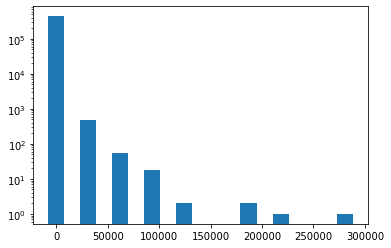

In [32]:
plt.hist(sp_dge.obs['total_counts'], histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [81]:
lower_lim = sp_dge.obs['total_counts'] > 400
upper_lim = sp_dge.obs['total_counts'] < 150000
# sp_dge.obs['keep'] = lower_lim & upper_lim
print(np.sum(lower_lim))
print(np.sum(upper_lim))
keep = lower_lim & upper_lim
print(sum(keep))

150935
442168
150931


In [82]:
sp_dge_fil = sp_dge[keep, :]

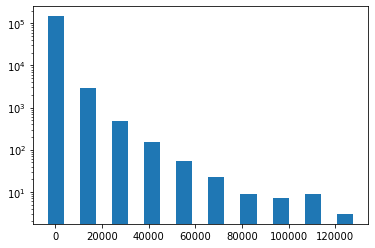

In [84]:
plt.hist(sp_dge_fil.obs['total_counts'], histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

(array([9.3629e+04, 3.3972e+04, 1.3851e+04, 5.6840e+03, 2.3150e+03,
        9.3000e+02, 3.4800e+02, 1.3600e+02, 4.6000e+01, 2.0000e+01]),
 array([  318. ,  1355.5,  2393. ,  3430.5,  4468. ,  5505.5,  6543. ,
         7580.5,  8618. ,  9655.5, 10693. ]),
 <a list of 10 Patch objects>)

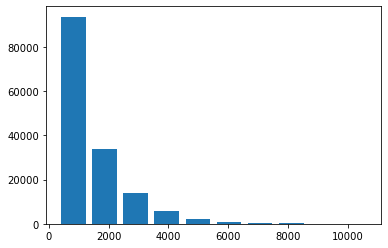

In [85]:
plt.hist(sp_dge_fil.obs["n_genes_by_counts"], histtype='bar', rwidth=0.8)

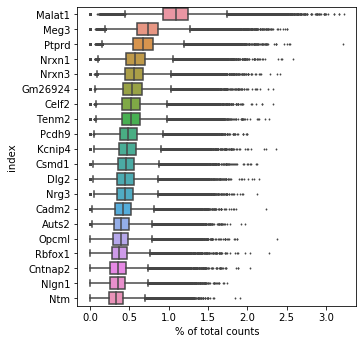

In [87]:
sc.pl.highest_expr_genes(sp_dge_fil, n_top=20, )

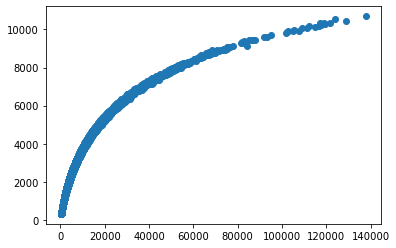

In [88]:
plt.scatter(sp_dge_fil.obs['total_counts'],sp_dge_fil.obs['n_genes_by_counts'])

# published dge matrix
#####################################################

In [19]:
input_file = "/Volumes/win_mac/dge_matrix_original/GSM3017261_150000_CNS_nuclei.h5ad"
sp_dge_or = sc.read(input_file)

In [20]:
sp_dge_or

AnnData object with n_obs × n_vars = 156049 × 26894 

In [21]:
sc.pp.normalize_total(sp_dge_or, target_sum=1e4)

In [22]:
sc.pp.log1p(sp_dge_or)

In [24]:
np.sum(sp_dge_or.X[0,])

1100.7025

In [25]:
sp_dge_or

AnnData object with n_obs × n_vars = 156049 × 26894 

In [33]:
sc.pp.calculate_qc_metrics(sp_dge_or, inplace=True)

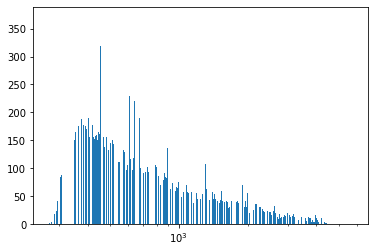

In [34]:
plt.hist(sp_dge_or.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.xscale('log')

In [ ]:
k_t.obs['no_umis'] = np.sum(k_t.X, axis=1)
no_umis = k_t.obs['no_umis']

In [ ]:
no_umis_log10 = []
for x in no_umis:
    if x != 0:
        no_umis_log10.append(log(x,10))
    else:
        no_umis_log10.append(x)

In [ ]:
plt.hist(no_umis, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [ ]:
plt.hist(no_umis_log10, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')

In [ ]:
k_t.obs['no_umis'].sum()